# Data visualization with GeoPandas

In [1]:
# Imports
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Read in Data
df = pd.read_csv('../data/cleaned_cdc.csv')

In [3]:
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
1,2011,AL,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,MALE
2,2011,AL,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,FEMALE
3,2011,AL,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHS
4,2011,AL,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHSGRAD


In [4]:
df_ovr = df[df['StratificationID1'] == 'OVERALL']
df_ovr.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
28,2011,AL,Alabama,34.7,7304.0,"(32.84057112200048, -86.63186076199969)",Q037,OVR,OVERALL
56,2011,AL,Alabama,43.8,7231.0,"(32.84057112200048, -86.63186076199969)",Q018,OVR,OVERALL
84,2011,AL,Alabama,24.3,7135.0,"(32.84057112200048, -86.63186076199969)",Q019,OVR,OVERALL
113,2011,AL,Alabama,42.4,7191.0,"(32.84057112200048, -86.63186076199969)",Q043,OVR,OVERALL


In [5]:
df_ovr_ow = df_ovr[df_ovr['QuestionID'] == 'Q036']
df_ovr_ow.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
252,2012,AL,Alabama,33.0,8651.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
337,2013,AL,Alabama,32.4,6244.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
592,2014,AL,Alabama,33.5,8190.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
673,2011,AK,Alaska,27.4,3336.0,"(64.84507995700051, -147.72205903599973)",Q036,OVR,OVERALL


In [6]:
df_ovr_ow.shape

(306, 9)

In [7]:
df_avg = df_ovr_ow.groupby('LocationAbbr').mean()
df_avg.head()

,YearStart,Data_Value,Sample_Size
LocationAbbr,,,
AK,2013.5,28.733333,3690.000000
AL,2013.5,33.700000,7383.000000
AR,2013.5,34.350000,4841.833333
AZ,2013.5,27.366667,8027.333333
CA,2013.5,24.466667,11873.166667


In [8]:
geo_dict = df.set_index('LocationAbbr').to_dict()['GeoLocation']

In [9]:
df_avg['geo_loc'] = df_avg.index.map(geo_dict)

In [10]:
df_avg.head()

,YearStart,Data_Value,Sample_Size,geo_loc
LocationAbbr,,,,
AK,2013.5,28.733333,3690.000000,"(64.84507995700051, -147.72205903599973)"
AL,2013.5,33.700000,7383.000000,"(32.84057112200048, -86.63186076199969)"
AR,2013.5,34.350000,4841.833333,"(34.74865012400045, -92.27449074299966)"
AZ,2013.5,27.366667,8027.333333,"(34.865970280000454, -111.76381127699972)"
CA,2013.5,24.466667,11873.166667,"(37.63864012300047, -120.99999953799971)"


In [11]:
df_avg.drop(columns = ['YearStart', 'Sample_Size'], inplace = True)

In [12]:
df_avg.head()

,Data_Value,geo_loc
LocationAbbr,,
AK,28.733333,"(64.84507995700051, -147.72205903599973)"
AL,33.700000,"(32.84057112200048, -86.63186076199969)"
AR,34.350000,"(34.74865012400045, -92.27449074299966)"
AZ,27.366667,"(34.865970280000454, -111.76381127699972)"
CA,24.466667,"(37.63864012300047, -120.99999953799971)"


In [13]:
df_avg.drop(columns = 'geo_loc', inplace = True)

In [14]:
gf = gp.GeoDataFrame(df_avg)

In [15]:
states = gp.read_file('../data/usa-states-census-2014.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [16]:
new = gf.merge(states, how = 'left', left_on = 'LocationAbbr', right_on = 'STUSPS')
new.head()

C:\Users\rmped\miniconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1487: FutureWarning: Accessing CRS of a GeoDataFrame without a geometry column is deprecated and will be removed in GeoPandas 0.12. Use GeoDataFrame.set_geometry to set the active geometry column.
  result.crs = self.crs


,Data_Value,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,28.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,33.700000,01,01779775,0400000US01,01,AL,Alabama,00,1.311724e+11,4.594951e+09,Southeast,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
2,34.350000,05,00068085,0400000US05,05,AR,Arkansas,00,1.347716e+11,2.960201e+09,Southeast,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
3,27.366667,04,01779777,0400000US04,04,AZ,Arizona,00,2.942053e+11,1.027791e+09,Southwest,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
4,24.466667,06,01779778,0400000US06,06,CA,California,00,4.034838e+11,2.048327e+10,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."


In [17]:
continental = new.dropna()

In [18]:
continental.sort_values(by = ['Data_Value'])

,Data_Value,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
5,21.050000,08,01779779,0400000US08,08,CO,Colorado,00,2.684269e+11,1.176085e+09,West,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
8,22.483333,11,01702382,0400000US11,11,DC,District of Columbia,00,1.583506e+08,1.863350e+07,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
20,23.400000,25,00606926,0400000US25,25,MA,Massachusetts,00,2.020394e+10,7.131806e+09,Northeast,"MULTIPOLYGON Z (((-70.27553 41.31046 0.00000, ..."
21,23.400000,25,00606926,0400000US25,25,MA,Massachusetts,00,2.020394e+10,7.131806e+09,Northeast,"MULTIPOLYGON Z (((-70.27553 41.31046 0.00000, ..."
4,24.466667,06,01779778,0400000US06,06,CA,California,00,4.034838e+11,2.048327e+10,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
52,24.733333,49,01455989,0400000US49,49,UT,Utah,00,2.128834e+11,7.000212e+09,West,"POLYGON Z ((-114.05247 37.60478 0.00000, -114...."
29,24.833333,30,00767982,0400000US30,30,MT,Montana,00,3.769638e+11,3.867841e+09,West,"POLYGON Z ((-116.04919 49.00091 0.00000, -115...."
55,25.133333,50,01779802,0400000US50,50,VT,Vermont,00,2.387190e+10,1.034369e+09,Northeast,"POLYGON Z ((-73.41632 44.09942 0.00000, -73.39..."
54,25.133333,50,01779802,0400000US50,50,VT,Vermont,00,2.387190e+10,1.034369e+09,Northeast,"POLYGON Z ((-73.41632 44.09942 0.00000, -73.39..."
39,25.166667,36,01779796,0400000US36,36,NY,New York,00,1.220546e+11,1.924205e+10,Northeast,"MULTIPOLYGON Z (((-72.01893 41.27411 0.00000, ..."


In [19]:
continental.crs

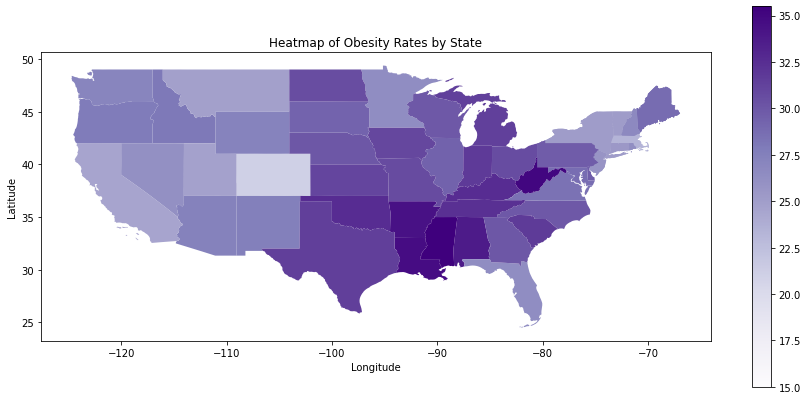

In [20]:
continental.plot(cmap = 'Purples', figsize = (15,7), column = 'Data_Value', legend = True, vmin = 15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Obesity Rates by State')
plt.savefig('../images/us_obesity.png');

C:\Users\rmped\miniconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1487: FutureWarning: Accessing CRS of a GeoDataFrame without a geometry column is deprecated and will be removed in GeoPandas 0.12. Use GeoDataFrame.set_geometry to set the active geometry column.
  result.crs = self.crs


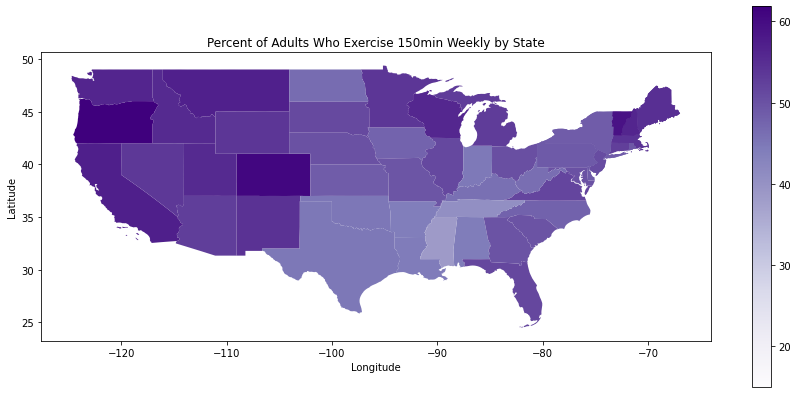

In [2]:
df = pd.read_csv('../data/cleaned_cdc.csv')
df_ovr = df[df['StratificationID1'] == 'OVERALL']
df_ovr_ow = df_ovr[df_ovr['QuestionID'] == 'Q043']
df_avg = df_ovr_ow.groupby('LocationAbbr').mean()
df_avg.drop(columns = ['YearStart', 'Sample_Size'], inplace = True)
gf = gp.GeoDataFrame(df_avg)
states = gp.read_file('../data/usa-states-census-2014.shp')
new = gf.merge(states, how = 'left', left_on = 'LocationAbbr', right_on = 'STUSPS')
continental = new.dropna()
continental.sort_values(by = ['Data_Value'])
continental.crs
continental.plot(cmap = 'Purples', figsize = (15,7), column = 'Data_Value', legend = True, vmin = 15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Percent of Adults Who Exercise 150min Weekly by State')
plt.savefig('../images/us_exercise.png');

C:\Users\rmped\miniconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1487: FutureWarning: Accessing CRS of a GeoDataFrame without a geometry column is deprecated and will be removed in GeoPandas 0.12. Use GeoDataFrame.set_geometry to set the active geometry column.
  result.crs = self.crs


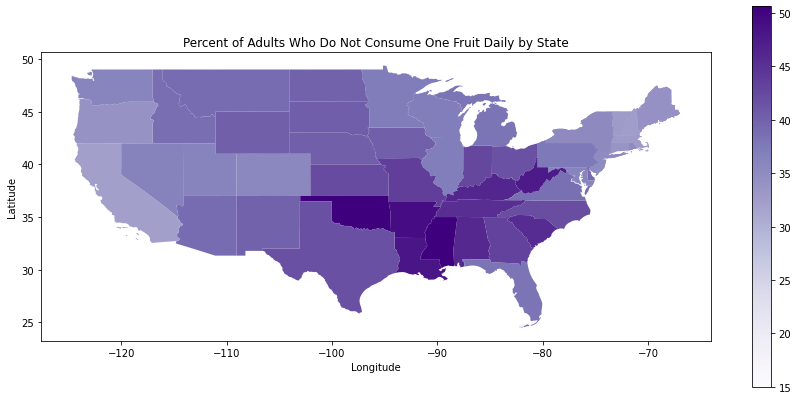

In [3]:
df = pd.read_csv('../data/cleaned_cdc.csv')
df_ovr = df[df['StratificationID1'] == 'OVERALL']
df_ovr_ow = df_ovr[df_ovr['QuestionID'] == 'Q018']
df_avg = df_ovr_ow.groupby('LocationAbbr').mean()
df_avg.drop(columns = ['YearStart', 'Sample_Size'], inplace = True)
gf = gp.GeoDataFrame(df_avg)
states = gp.read_file('../data/usa-states-census-2014.shp')
new = gf.merge(states, how = 'left', left_on = 'LocationAbbr', right_on = 'STUSPS')
continental = new.dropna()
continental.sort_values(by = ['Data_Value'])
continental.crs
continental.plot(cmap = 'Purples', figsize = (15,7), column = 'Data_Value', legend = True, vmin = 15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Percent of Adults Who Do Not Consume One Fruit Daily by State')
plt.savefig('../images/us_fruit.png');

C:\Users\rmped\miniconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1487: FutureWarning: Accessing CRS of a GeoDataFrame without a geometry column is deprecated and will be removed in GeoPandas 0.12. Use GeoDataFrame.set_geometry to set the active geometry column.
  result.crs = self.crs


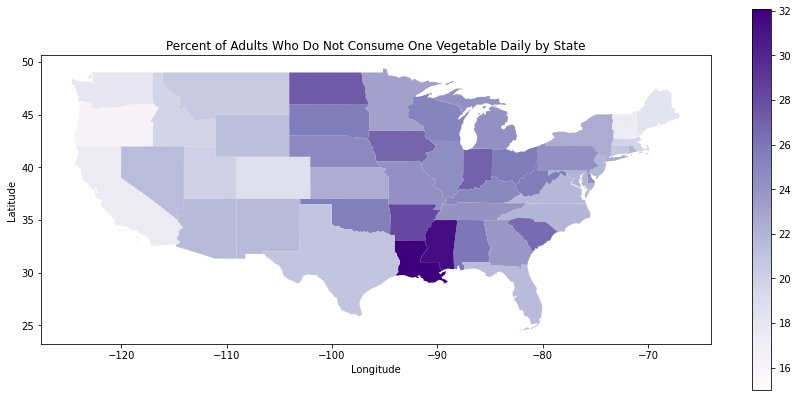

In [4]:
df = pd.read_csv('../data/cleaned_cdc.csv')
df_ovr = df[df['StratificationID1'] == 'OVERALL']
df_ovr_ow = df_ovr[df_ovr['QuestionID'] == 'Q019']
df_avg = df_ovr_ow.groupby('LocationAbbr').mean()
df_avg.drop(columns = ['YearStart', 'Sample_Size'], inplace = True)
gf = gp.GeoDataFrame(df_avg)
states = gp.read_file('../data/usa-states-census-2014.shp')
new = gf.merge(states, how = 'left', left_on = 'LocationAbbr', right_on = 'STUSPS')
continental = new.dropna()
continental.sort_values(by = ['Data_Value'])
continental.crs
continental.plot(cmap = 'Purples', figsize = (15,7), column = 'Data_Value', legend = True, vmin = 15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Percent of Adults Who Do Not Consume One Vegetable Daily by State')
plt.savefig('../images/us_veggies.png');